<a href="https://colab.research.google.com/github/ustab/BTK-PythonTensorflow/blob/master/SAPLON_DEEP_LEARNING_M_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Observing Learning Curve Changes

**Learning Objectives**

### Learning objectives
1. xxxxxx
2. xxxxxxx
3. xxxxxxx 


## Introduction 


In this notebook, you will observe learning curve change on ______.  You will use the Keras Sequential Model to build an ML model to predict housing prices.

A learning curve is a plot of model learning performance over experience or time.

Learning curves are a widely used diagnostic tool in machine learning for algorithms that learn from a training dataset incrementally. The model can be evaluated on the training dataset and on a hold out validation dataset after each update during training and plots of the measured performance can created to show learning curves.

Reviewing learning curves of models during training can be used to diagnose problems with learning, such as an underfit or overfit model, as well as whether the training and validation datasets are suitably representative.

https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/#:~:text=A%20learning%20curve%20is%20a,from%20a%20training%20dataset%20incrementally.&text=Learning%20curves%20are%20plots%20that,time%20in%20terms%20of%20experience.

Each learning objective will correspond to a __#TODO__ in the [student lab notebook](../labs/keras_dnn.ipynb) -- try to complete that notebook first before reviewing this solution notebook. 


Start by importing the necessary libraries for this lab.

In [ ]:
!sudo chown -R jupyter:jupyter /home/jupyter/training-data-analyst

chown: invalid user: ‘jupyter:jupyter’


In [ ]:
# Install Sklearn
!python3 -m pip install --user sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=b0300e3c978b5a8db9ad8687e429f1bb45e26e992ae1a027668eb2693634cf27
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


# Yeni Bölüm

# Yeni Bölüm

In [ ]:
# Ensure the right version of Tensorflow is installed.
!pip freeze | grep tensorflow==2.1 || pip install tensorflow==2.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 421.8 MB 24 kB/s 
     |████████████████████████████████| 3.8 MB 40.2 MB/s 
     |████████████████████████████████| 448 kB 51.5 MB/s 
     |████████████████████████████████| 26.1 MB 1.7 MB/s 
     |████████████████████████████████| 50 kB 7.8 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=d7a27707521c98bd9d887d208e2d650140d775c230ac010609357f8d04e2b526
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      

**Note:** After executing the above cell you will see the output
`tensorflow==2.1.0` that is the installed version of tensorflow.

In [ ]:
import os
import tensorflow.keras

import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from tensorflow import feature_column as fc
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
print("TensorFlow version: ",tf.version.VERSION)


TensorFlow version:  2.8.2


Many of the Google Machine Learning Courses Programming Exercises use the  [California Housing Dataset](https://developers.google.com/machine-learning/crash-course/california-housing-data-description
), which contains data drawn from the 1990 U.S. Census.  Our lab dataset has been pre-processed so that there are no missing values.

First, let's download the raw .csv data by copying the data from a cloud storage bucket.


In [ ]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [ ]:
if not os.path.isdir("../data"):
    os.makedirs("../data")

In [ ]:
!gsutil cp gs://cloud-training-demos/feat_eng/housing/housing_pre-proc.csv ../data    

Copying gs://cloud-training-demos/feat_eng/housing/housing_pre-proc.csv...
/ [1 files][  1.4 MiB/  1.4 MiB]                                                
Operation completed over 1 objects/1.4 MiB.                                      


Now, let's read in the dataset just copied from the cloud storage bucket and create a Pandas dataframe.

In [ ]:
housing_df = pd.read_csv('../data/housing_pre-proc.csv', error_bad_lines=False)
housing_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


We can use .describe() to see some summary statistics for the numeric fields in our dataframe. Note, for example, the count row and corresponding columns. The count shows 20433.000000 for all feature columns. Thus, there are no missing values.

####  Split the dataset for ML

The dataset we loaded was a single CSV file. We will split this into train, validation, and test sets.


In [ ]:
train, test = train_test_split(housing_df, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)

print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

train.to_csv('../data/housing-train.csv', encoding='utf-8', index=False)
val.to_csv('../data/housing-val.csv', encoding='utf-8', index=False)
test.to_csv('../data/housing-test.csv', encoding='utf-8', index=False)

13076 train examples
3270 validation examples
4087 test examples


In [ ]:
# A utility method to create a tf.data dataset from a Pandas Dataframe

def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('median_house_value')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

# Next we initialize the training and validation datasets.
batch_size = 32
train_ds = df_to_dataset(train)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)

# Input Pipeline
numeric_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                'total_bedrooms', 'population', 'households', 'median_income']

# Next, we scale the numerical feature columns that we assigned to the variable "numeric cols".
# Scalar def get_scal(feature):
def get_scal(feature):
    def minmax(x):
        mini = train[feature].min()
        maxi = train[feature].max()
        return (x - mini)/(maxi-mini)
        return(minmax)
    
feature_columns = []
for header in numeric_cols:
    scal_input_fn = get_scal(header)
    feature_columns.append(fc.numeric_column(header,
                                             normalizer_fn=scal_input_fn))


### Using the Keras Sequential Model

Next, we will run this cell to compile and fit the Keras Sequential model.

## Model 1 - hard cording the learning rate to .5

In [ ]:
# Model create

feature_layer = tf.keras.layers.DenseFeatures(feature_columns, dtype='float64')

model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(12, input_dim=8, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(1, activation='linear',  name='median_house_value')
])

# Model compile
opt = keras.optimizers.Adam(learning_rate=.5)
model.compile(optimizer=opt,
              loss='mse',
              metrics=['mse'])

# Model Fit
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=32)

Epoch 1/32


398/409 [============================>.] - ETA: 0s - loss: 13940589568.0000 - mse: 13940589568.0000

409/409 [==============================] - 3s 4ms/step - loss: 13852058624.0000 - mse: 13852058624.0000 - val_loss: 10715769856.0000 - val_mse: 10715769856.0000
Epoch 2/32
409/409 [==============================] - 1s 3ms/step - loss: 10026314752.0000 - mse: 10026314752.0000 - val_loss: 9926435840.0000 - val_mse: 9926435840.0000
Epoch 3/32
409/409 [==============================] - 1s 3ms/step - loss: 9341093888.0000 - mse: 9341093888.0000 - val_loss: 7195714560.0000 - val_mse: 7195714560.0000
Epoch 4/32
409/409 [==============================] - 1s 2ms/step - loss: 7879192576.0000 - mse: 7879192576.0000 - val_loss: 6557781504.0000 - val_mse: 6557781504.0000
Epoch 5/32
409/409 [==============================] - 1s 3ms/step - loss: 7973514752.0000 - mse: 7973514752.0000 - val_loss: 9395450880.0000 - val_mse: 9395450880.0000
Epoch 6/32
409/409 [==============================] - 1s 3ms/step - loss: 8236338176.0000 - mse: 8236338176.0000 - val_loss: 8519458816.0000 - val_mse: 8519458816.00

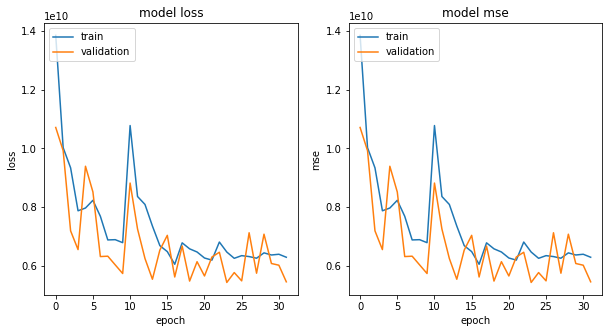

In [ ]:
def plot_curves(history, metrics):
    nrows = 1
    ncols = 2
    fig = plt.figure(figsize=(10, 5))

    for idx, key in enumerate(metrics):  
        ax = fig.add_subplot(nrows, ncols, idx+1)
        plt.plot(history.history[key])
        plt.plot(history.history['val_{}'.format(key)])
        plt.title('model {}'.format(key))
        plt.ylabel(key)
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left'); 
plot_curves(history, ['loss', 'mse'])

# Print .5

## Model 2 - hard cording the learning rate to .1

In [ ]:
# Model create
feature_layer = tf.keras.layers.DenseFeatures(feature_columns, dtype='float64')

model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(12, input_dim=8, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(1, activation='linear',  name='median_house_value')
])

# Model compile
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1),
              loss='mse',
              metrics=['mse'])

# Model Fit
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=32)

Epoch 1/32


393/409 [===========================>..] - ETA: 0s - loss: 16277086208.0000 - mse: 16277086208.0000

409/409 [==============================] - 2s 3ms/step - loss: 16071007232.0000 - mse: 16071007232.0000 - val_loss: 10718229504.0000 - val_mse: 10718229504.0000
Epoch 2/32
409/409 [==============================] - 1s 2ms/step - loss: 10315328512.0000 - mse: 10315328512.0000 - val_loss: 9491794944.0000 - val_mse: 9491794944.0000
Epoch 3/32
409/409 [==============================] - 1s 2ms/step - loss: 9150245888.0000 - mse: 9150245888.0000 - val_loss: 9907513344.0000 - val_mse: 9907513344.0000
Epoch 4/32
409/409 [==============================] - 1s 2ms/step - loss: 8326064128.0000 - mse: 8326064128.0000 - val_loss: 8301357056.0000 - val_mse: 8301357056.0000
Epoch 5/32
409/409 [==============================] - 1s 3ms/step - loss: 7989916160.0000 - mse: 7989916160.0000 - val_loss: 7316492800.0000 - val_mse: 7316492800.0000
Epoch 6/32
409/409 [==============================] - 1s 2ms/step - loss: 7819990016.0000 - mse: 7819990016.0000 - val_loss: 7549597184.0000 - val_mse: 7549597184.00

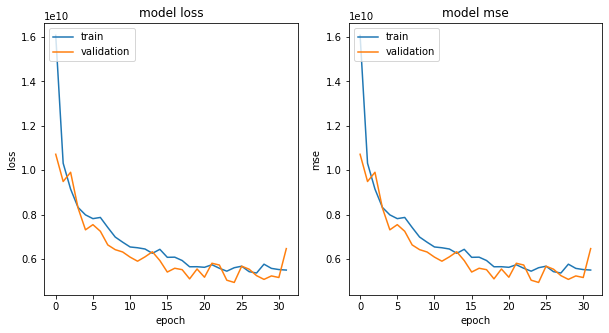

In [ ]:
def plot_curves(history, metrics):
    nrows = 1
    ncols = 2
    fig = plt.figure(figsize=(10, 5))

    for idx, key in enumerate(metrics):  
        ax = fig.add_subplot(nrows, ncols, idx+1)
        plt.plot(history.history[key])
        plt.plot(history.history['val_{}'.format(key)])
        plt.title('model {}'.format(key))
        plt.ylabel(key)
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left');  
plot_curves(history, ['loss', 'mse'])

# ME:  Add a print title:  .1

## Model 3 - hard cording the learning rate to .01 

In [ ]:
# Model create

feature_layer = tf.keras.layers.DenseFeatures(feature_columns, dtype='float64')

model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(12, input_dim=8, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(1, activation='linear',  name='median_house_value')
])

# Model compile
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss='mse',
              metrics=['mse'])

# Model Fit
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=32)  # Increase Epochs to 32

Epoch 1/32


393/409 [===========================>..] - ETA: 0s - loss: 29122514944.0000 - mse: 29122514944.0000

409/409 [==============================] - 2s 3ms/step - loss: 28830984192.0000 - mse: 28830984192.0000 - val_loss: 22066860032.0000 - val_mse: 22066860032.0000
Epoch 2/32
409/409 [==============================] - 1s 2ms/step - loss: 17029300224.0000 - mse: 17029300224.0000 - val_loss: 11527073792.0000 - val_mse: 11527073792.0000
Epoch 3/32
409/409 [==============================] - 1s 3ms/step - loss: 11009028096.0000 - mse: 11009028096.0000 - val_loss: 10664720384.0000 - val_mse: 10664720384.0000
Epoch 4/32
409/409 [==============================] - 1s 2ms/step - loss: 10520712192.0000 - mse: 10520712192.0000 - val_loss: 10163158016.0000 - val_mse: 10163158016.0000
Epoch 5/32
409/409 [==============================] - 1s 3ms/step - loss: 10155285504.0000 - mse: 10155285504.0000 - val_loss: 9919426560.0000 - val_mse: 9919426560.0000
Epoch 6/32
409/409 [==============================] - 1s 3ms/step - loss: 9766145024.0000 - mse: 9766145024.0000 - val_loss: 9372519424.0000 - val_mse: 9

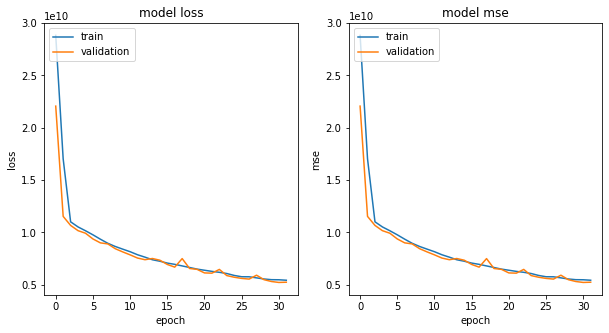

In [ ]:
def plot_curves(history, metrics):
    nrows = 1
    ncols = 2
    fig = plt.figure(figsize=(10, 5))

    for idx, key in enumerate(metrics):  
        ax = fig.add_subplot(nrows, ncols, idx+1)
        plt.plot(history.history[key])
        plt.plot(history.history['val_{}'.format(key)])
        plt.title('model {}'.format(key))
        plt.ylabel(key)
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left');  
plot_curves(history, ['loss', 'mse'])

# Print .01 in title

## Model 4 - hard cording the learning rate to .001 

In [ ]:
# Model create

feature_layer = tf.keras.layers.DenseFeatures(feature_columns, dtype='float64')

model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(12, input_dim=8, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(1, activation='linear',  name='median_house_value')
])

# Model compile
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='mse',
              metrics=['mse'])

# Model Fit
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=32)  # Increase Epochs to 32

Epoch 1/32


402/409 [============================>.] - ETA: 0s - loss: 52059758592.0000 - mse: 52059758592.0000

409/409 [==============================] - 2s 3ms/step - loss: 52019609600.0000 - mse: 52019609600.0000 - val_loss: 41172418560.0000 - val_mse: 41172418560.0000
Epoch 2/32
409/409 [==============================] - 1s 2ms/step - loss: 30678855680.0000 - mse: 30678855680.0000 - val_loss: 26248108032.0000 - val_mse: 26248108032.0000
Epoch 3/32
409/409 [==============================] - 1s 3ms/step - loss: 26998962176.0000 - mse: 26998962176.0000 - val_loss: 25895184384.0000 - val_mse: 25895184384.0000
Epoch 4/32
409/409 [==============================] - 1s 3ms/step - loss: 26681937920.0000 - mse: 26681937920.0000 - val_loss: 25508829184.0000 - val_mse: 25508829184.0000
Epoch 5/32
409/409 [==============================] - 1s 3ms/step - loss: 26266699776.0000 - mse: 26266699776.0000 - val_loss: 25006946304.0000 - val_mse: 25006946304.0000
Epoch 6/32
409/409 [==============================] - 1s 2ms/step - loss: 25693085696.0000 - mse: 25693085696.0000 - val_loss: 24392701952.0000 - val_m

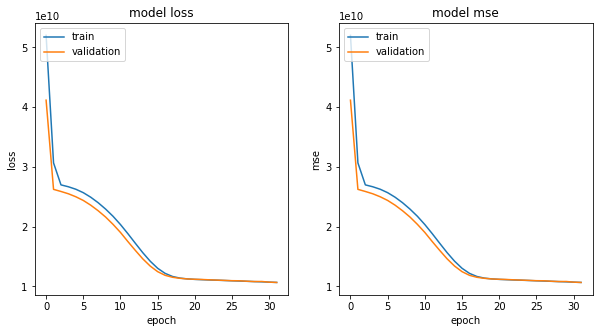

In [ ]:
def plot_curves(history, metrics):
    nrows = 1
    ncols = 2
    fig = plt.figure(figsize=(10, 5))

    for idx, key in enumerate(metrics):  
        ax = fig.add_subplot(nrows, ncols, idx+1)
        plt.plot(history.history[key])
        plt.plot(history.history['val_{}'.format(key)])
        plt.title('model {}'.format(key))
        plt.ylabel(key)
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left');  
        
plot_curves(history, ['loss', 'mse'])

# Print .001

CONVERGENCE!

Copyright 2020 Google Inc.
Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.